In [1]:
import tensorflow as tf
import os
import time
import glob
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import datetime
import sys
sys.path.append('../')
from utils import get_dataset_paths, creat_dataset

## Variables

In [2]:
dataset_path = '/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset'
checkpoint_dir = './training_checkpoints'
log_dir = "./logs/"

num_classes = 5
resize_shape = (384 , 384)# to resize all images and labels of the dataset by reading
input_shape = (256, 256) # network input

buffer_size = 400
batch_size = 1
Lambda = 100
epochs = 100

## Load and Prepare the dataset

In [3]:
def preparation(image, label , center_crop_rate=0.7, input_shape=(256, 256) ):
    
  
    image =  tf.image.central_crop(image, center_crop_rate)
    label =  tf.image.central_crop(label, center_crop_rate)

    image =  tf.image.resize(image, input_shape, method='bilinear')
    label =  tf.image.resize(label, input_shape, method='bilinear')
  
    image = tf.cast(image, dtype= tf.float32)
    label = tf.cast(label, dtype= tf.float32 )  
    
    print(image.shape, label.shape)
    return image, label

In [4]:
def normalize(image, label):
    # normalizing the images to [-1, 1]
    
    image = tf.image.per_image_standardization(image)
    #image = (image / 127.5) - 1
    #label = (label / 127.5) - 1

    return image, label

In [5]:
@tf.function()
def random_augmentation(image, label):
    
    #if tf.random.uniform(()) > 0.5:
    #    image = tf.image.random_brightness(image, max_delta=.50)
        
    #if tf.random.uniform(()) > 0.5:
    #    image = tf.image.random_saturation(image, lower=0.5, upper=1.5)
        
    if tf.random.uniform(()) > 0.5:
        image = tf.image.rot90(image, k=1, name=None)
        label = tf.image.rot90(label, k=1, name=None)
        
    if tf.random.uniform(()) > 0.5:
        image = tf.image.rot90(image, k=3, name=None)
        label = tf.image.rot90(label, k=3, name=None)
        
    #image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    
    if tf.random.uniform(()) > 0.5:
        # random mirroring
        image = tf.image.flip_left_right(image)
        label = tf.image.flip_left_right(label)
        

        
    return image, label

In [6]:
def show_img(img,label, n_classes):
    img = img[0,:,:,:]
    label = label[0,:,:,:]

    plt.imshow(img)
    fig, axs = plt.subplots(1,n_classes, figsize=(15, 6), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i in range(n_classes):
        axs[i].imshow(label[:,:,i])
        axs[i].set_title('Ground T of Channel ' + str(i))
        print('Unique numbers in channel {} are {},{}'.format(i, np.min(np.unique(label[:, :, i])),np.max(np.unique(label[:, :, i]))))

    plt.show()

In [7]:
def load_image_train(image_file, label_file):
    image, label= preparation(image_file, label_file)
    image, label = random_augmentation(image, label)
    image, label = normalize(image, label)

    return image, label

In [8]:
dataset_paths = get_dataset_paths(dataset_path)
x_train, y_train = creat_dataset(dataset_paths, resize_shape, num_classes)

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177/ADC/ADC.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177/DWI/DWI.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177/T2W/T2W.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/177/label/Segmentation.nrrd label shape (384, 384, 19, 5)
--------------------------------------------------------------
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/129

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/129/ADC/ADC.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/129/DWI/DWI.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/129/T2W/T2W.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/72/label/Segmentation.nrrd label shape (384, 384, 19, 5)
--------------------------------------------------------------
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/136

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/136/ADC/ADC.nii image shape (384, 384, 21)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/136/DWI/DWI.nii image shape (384, 384, 21)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/136/T2W/T2W.nii image shape (384, 384, 21)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/136/label/Segmentation.nrrd label shape (384, 384, 21, 5)
--------------------------------------------------------------
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/107

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/107/ADC/ADC.nii image shape (384, 384, 23)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/107/DWI/DWI.nii ima

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/31/label/Segmentation.nrrd label shape (384, 384, 19, 5)
--------------------------------------------------------------
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/180

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/180/ADC/ADC.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/180/DWI/DWI.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/180/T2W/T2W.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/180/label/Segmentation.nrrd label shape (384, 384, 19, 5)
--------------------------------------------------------------
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/94

/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/94/ADC/ADC.nii image shape (384, 384, 19)
/storage/ziaeea21/projects/Prostate_Segmentation/data/Dataset/94/DWI/DWI.nii image 

In [9]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(load_image_train, num_parallel_calls=tf.data.AUTOTUNE)

train_dataset = train_dataset.shuffle(buffer_size)
train_dataset = train_dataset.batch(batch_size)

(256, 256, 3) (256, 256, 5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


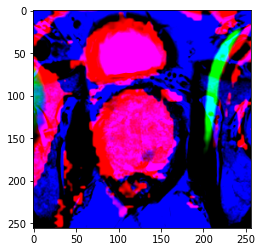

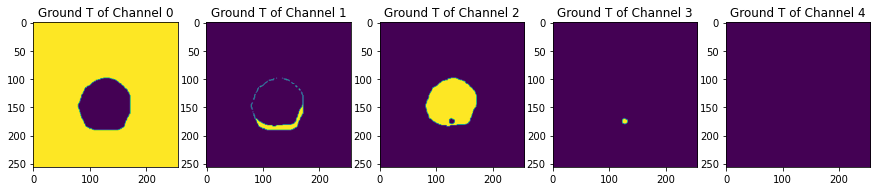

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 1.0,1.0
Unique numbers in channel 1 are 0.0,0.0
Unique numbers in channel 2 are 0.0,0.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,0.0


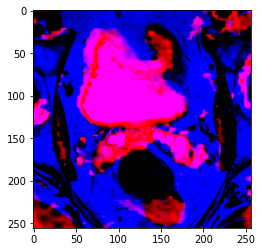

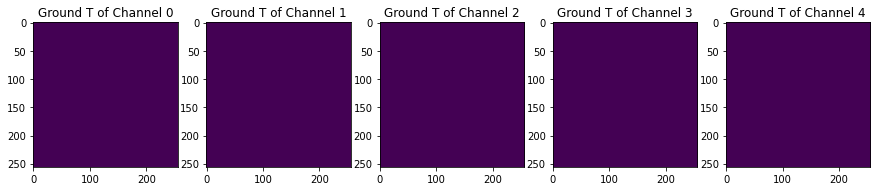

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


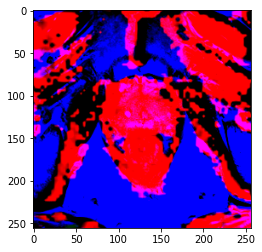

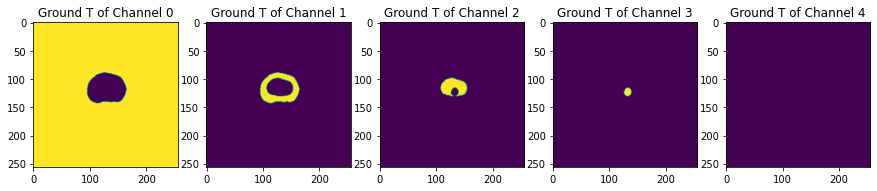

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,1.0


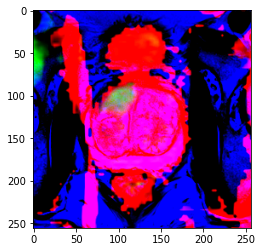

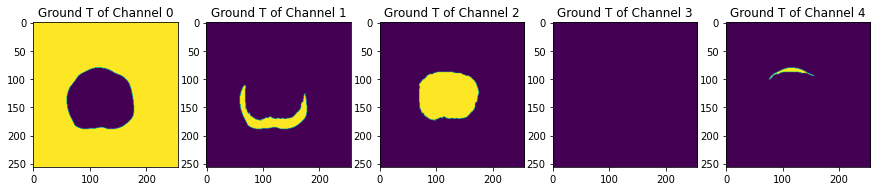

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


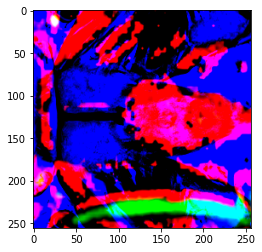

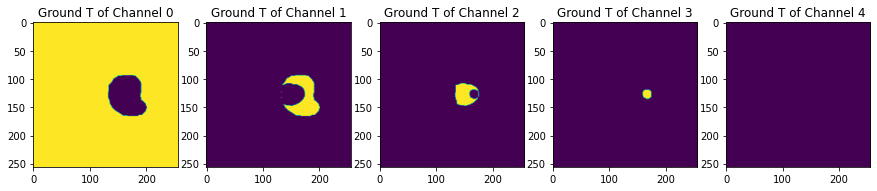

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,1.0


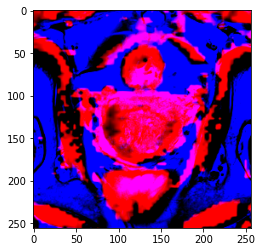

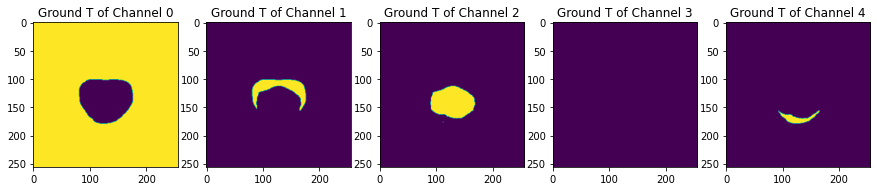

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,1.0


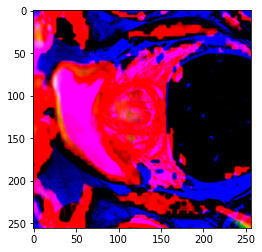

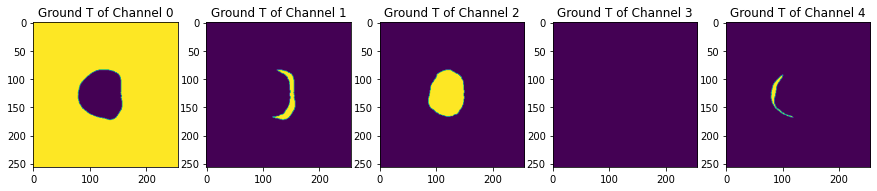

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,1.0


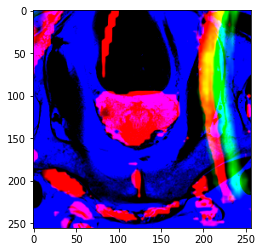

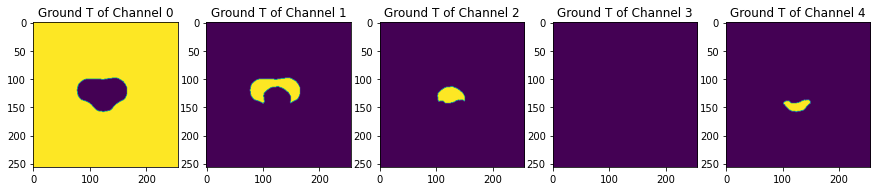

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,1.0


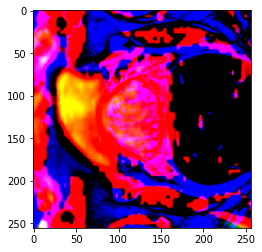

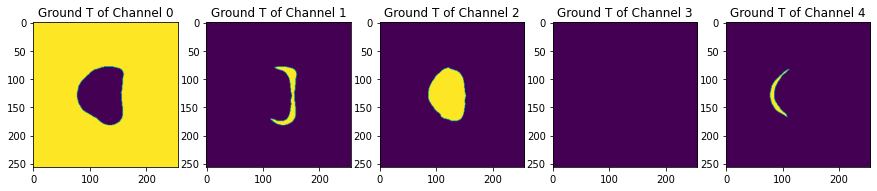

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,0.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,0.0


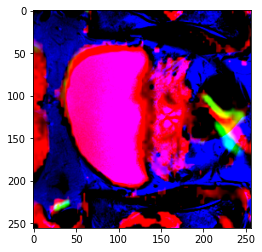

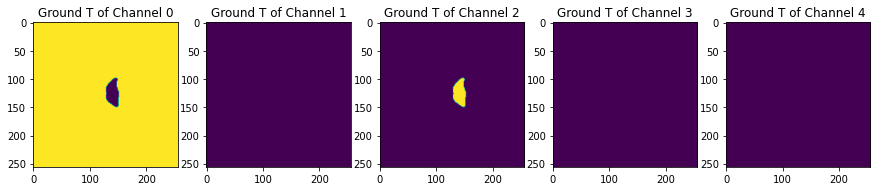

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,0.0


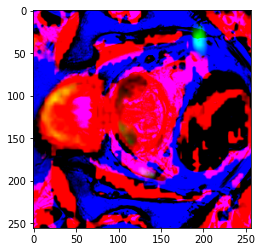

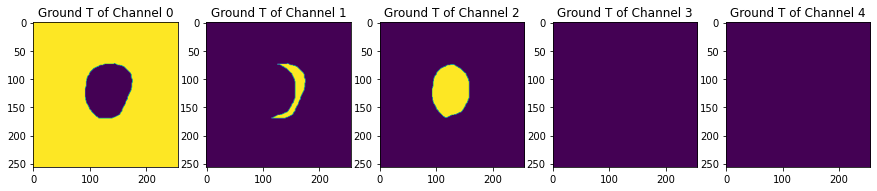

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,1.0


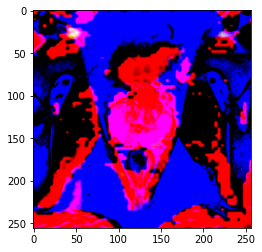

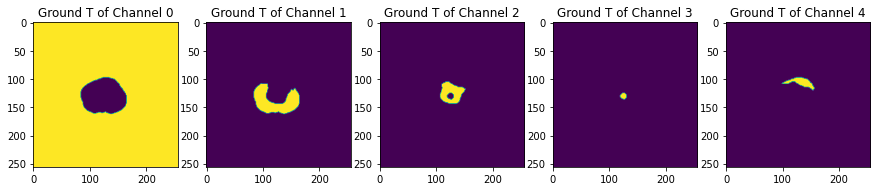

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,0.0


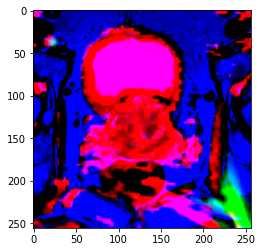

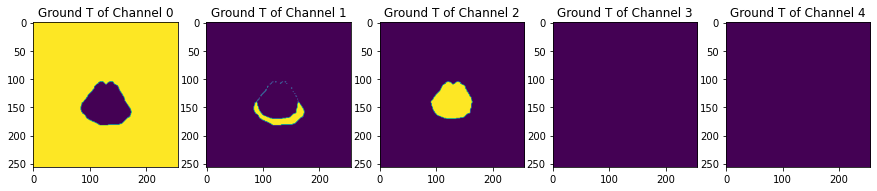

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,1.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,1.0
Unique numbers in channel 4 are 0.0,0.0


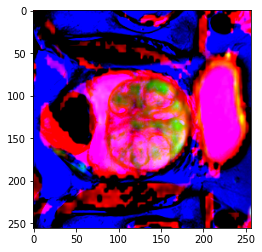

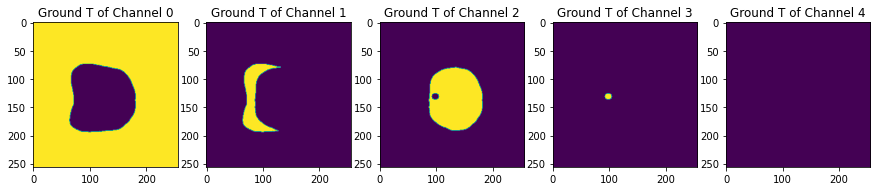

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 256, 256, 3) (1, 256, 256, 5)
Unique numbers in channel 0 are 0.0,1.0
Unique numbers in channel 1 are 0.0,0.0
Unique numbers in channel 2 are 0.0,1.0
Unique numbers in channel 3 are 0.0,0.0
Unique numbers in channel 4 are 0.0,0.0


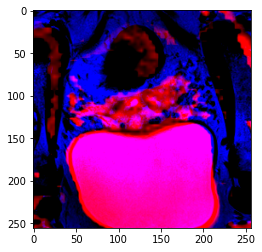

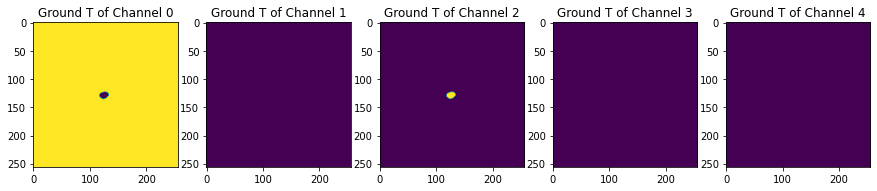

In [10]:
for example_input, example_target in train_dataset.take(15):
    print(example_input.shape, example_target.shape)

    show_img(example_input, example_target, 5)


## Build the Generator

   * The architecture of generator is a modified U-Net.
   * Each block in the encoder is (Conv -> Batchnorm -> Leaky ReLU)
   * Each block in the decoder is (Transposed Conv -> Batchnorm -> Dropout(applied to the first 3 blocks) -> ReLU)
   * There are skip connections between the encoder and decoder (as in U-Net).


In [11]:
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
               tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
               kernel_initializer=initializer, use_bias=False)
               )

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())

    result.add(tf.keras.layers.LeakyReLU())

    return result

In [12]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
               tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
               padding='same',
               kernel_initializer=initializer,
               use_bias=False)
               )

    result.add(tf.keras.layers.BatchNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

    result.add(tf.keras.layers.ReLU())

    return result

In [13]:
def Generator():
    inputs = tf.keras.layers.Input(shape=[256, 256, 3])

    down_stack = [
                    downsample(64, 4, apply_batchnorm=False),  # (bs, 128, 128, 64)
                    downsample(128, 4),  # (bs, 64, 64, 128)
                    downsample(256, 4),  # (bs, 32, 32, 256)
                    downsample(512, 4),  # (bs, 16, 16, 512)
                    downsample(512, 4),  # (bs, 8, 8, 512)
                    downsample(512, 4),  # (bs, 4, 4, 512)
                    downsample(512, 4),  # (bs, 2, 2, 512)
                    downsample(512, 4),  # (bs, 1, 1, 512)
                  ]

    up_stack = [
                    upsample(512, 4, apply_dropout=True),  # (bs, 2, 2, 1024)
                    upsample(512, 4, apply_dropout=True),  # (bs, 4, 4, 1024)
                    upsample(512, 4, apply_dropout=True),  # (bs, 8, 8, 1024)
                    upsample(512, 4),  # (bs, 16, 16, 1024)
                    upsample(256, 4),  # (bs, 32, 32, 512)
                    upsample(128, 4),  # (bs, 64, 64, 256)
                    upsample(64, 4),  # (bs, 128, 128, 128)
                ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(num_classes, 4,
                                           strides=2,
                                           padding='same',
                                           kernel_initializer=initializer,
                                           activation='sigmoid')  # (bs, 256, 256, OUTPUT_CHANNELS)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)
    return tf.keras.Model(inputs=inputs, outputs=x)


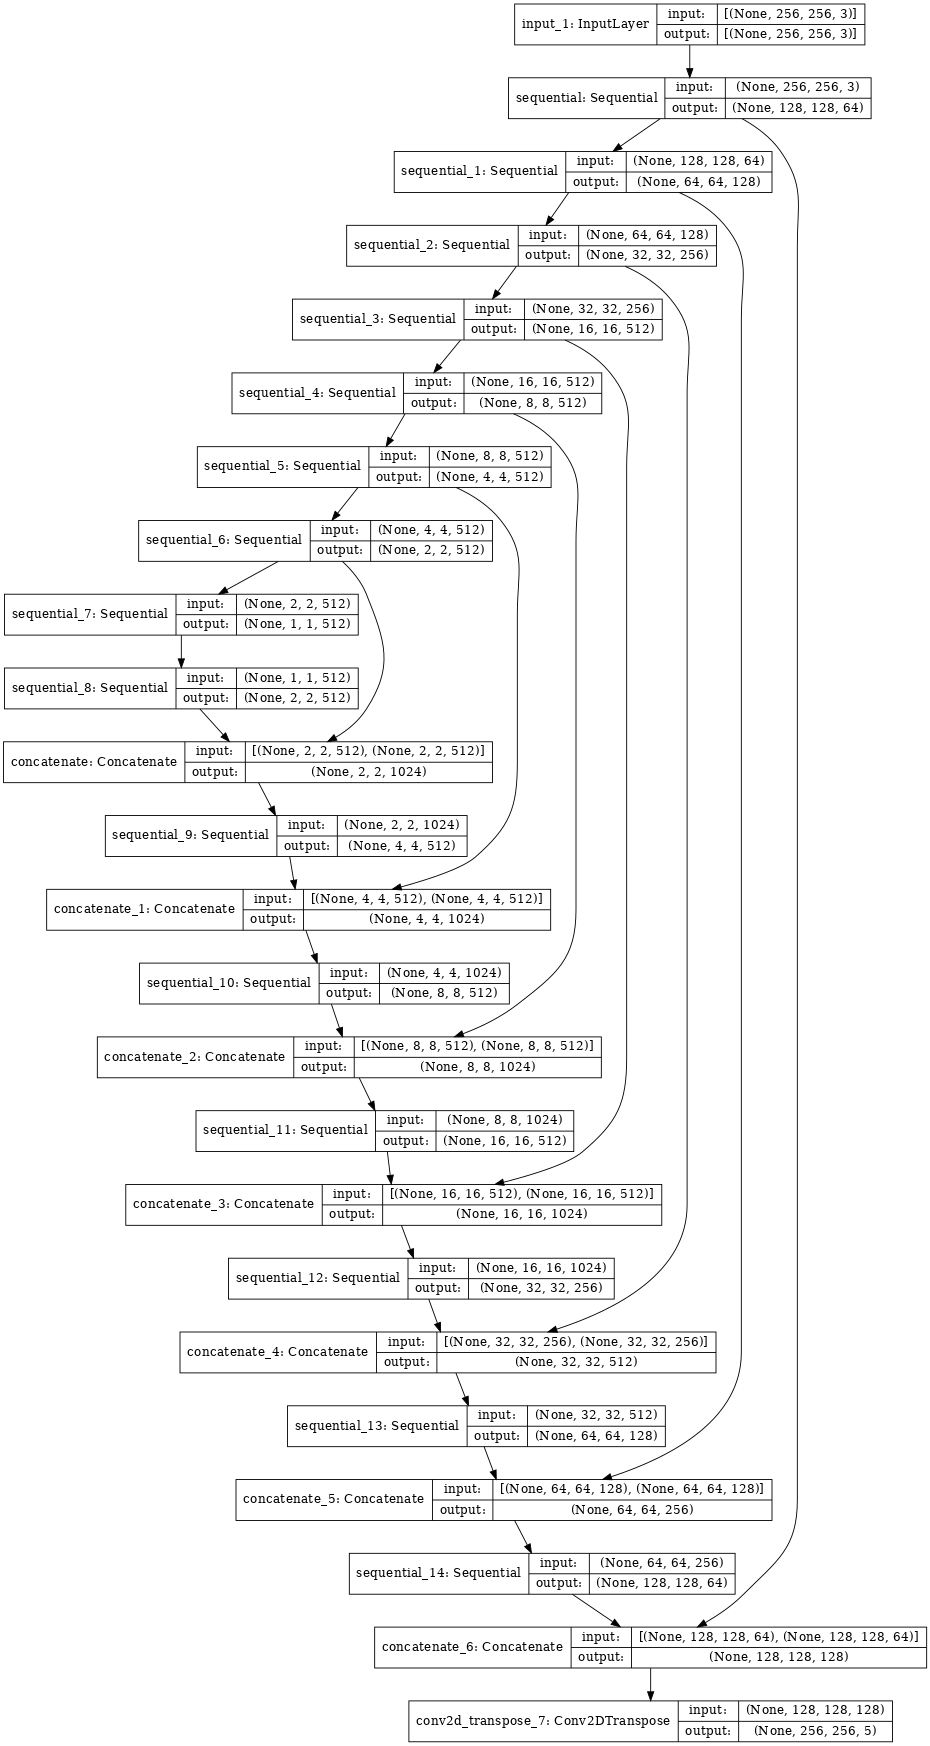

In [14]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)


(1, 256, 256, 5)


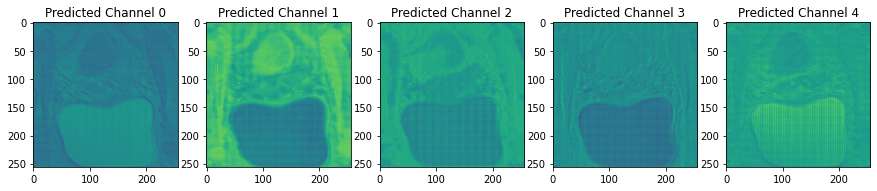

In [15]:
gen_output = generator(example_input, training=False)
fig, axs = plt.subplots(1, num_classes, figsize=(15, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i in range(num_classes):
        axs[i].imshow(gen_output[0,:,:,i])
        axs[i].set_title('Predicted Channel ' + str(i))
print(gen_output.shape)


## Generator loss

   * It is a sigmoid cross entropy loss of the generated images and an array of ones.
   * The paper also includes L1 loss which is MAE (mean absolute error) between the generated image and the target image.
   * This allows the generated image to become structurally similar to the target image.
   * The formula to calculate the total generator loss = gan_loss + LAMBDA * l1_loss, where LAMBDA = 100. This value was decided by the authors of the paper.

The training procedure for the generator is shown below:

In [16]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [17]:
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    # mean absolute error
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (Lambda * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

## Build the Discriminator

   * The Discriminator is a PatchGAN.
   * Each block in the discriminator is (Conv -> BatchNorm -> Leaky ReLU)
   * The shape of the output after the last layer is (batch_size, 30, 30, 1)
   * Each 30x30 patch of the output classifies a 70x70 portion of the input image (such an architecture is called a PatchGAN).
   * Discriminator receives 2 inputs.
      * Input image and the target image, which it should classify as real.
      * Input image and the generated image (output of generator), which it should classify as fake.
      * Concatenate these 2 inputs together in the code (tf.concat([inp, tar], axis=-1))


In [18]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
    tar = tf.keras.layers.Input(shape=[256, 256, num_classes], name='target_image')

    x = tf.keras.layers.concatenate([inp, tar])  # (bs, 256, 256, OUTPUT_CHANNELS + 3)

    down1 = downsample(64, 4, False)(x)  # (bs, 128, 128, 64)
    down2 = downsample(128, 4)(down1)  # (bs, 64, 64, 128)
    down3 = downsample(256, 4)(down2)  # (bs, 32, 32, 256)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (bs, 34, 34, 256)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (bs, 31, 31, 512)

    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (bs, 33, 33, 512)

    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (bs, 30, 30, 1)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)


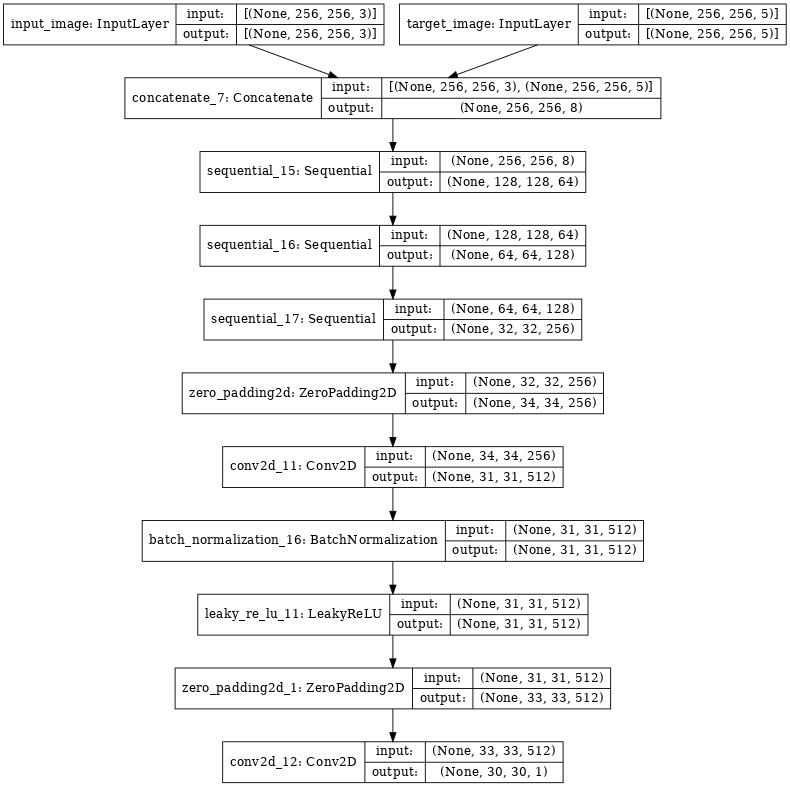

In [19]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)


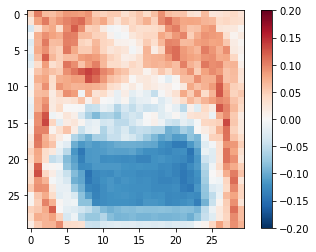

In [20]:
disc_out = discriminator([example_input, gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-.2, vmax=.2, cmap='RdBu_r')
plt.colorbar()


## Discriminator loss

   * The discriminator loss function takes 2 inputs; real images, generated images
   * real_loss is a sigmoid cross entropy loss of the real images and an array of ones(since these are the real images)
   * generated_loss is a sigmoid cross entropy loss of the generated images and an array of zeros(since these are the fake images)
   * Then the total_loss is the sum of real_loss and the generated_loss


In [21]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

## Define the Optimizers and Checkpoint-saver

In [22]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)


In [23]:
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)


## Generate Images

Write a function to plot some images during training.

   * Pass images from the validation dataset to the generator.
   * The generator will then translate the input image into the output.
   * Last step is to plot the predictions and voila!


In [24]:
def generate_images(model, test_input, tar):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(4, 4))

    display_list = [test_input[0], tar[0], prediction[0]]
    title = ['Input Image', 'GroundT of Channel ', 'Predicted Channel ']

    plt.imshow(display_list[0])
    fig, axs = plt.subplots(1,num_classes, figsize=(15, 6), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i in range(num_classes):
        axs[i].imshow(display_list[1][:,:,i])
        axs[i].set_title(title[1] + str(i))
        
    fig, axs = plt.subplots(1,num_classes, figsize=(15, 6), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i in range(num_classes):
        axs[i].imshow(display_list[2][:,:,i])
        axs[i].set_title(title[2] + str(i))
    plt.show()
    print()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


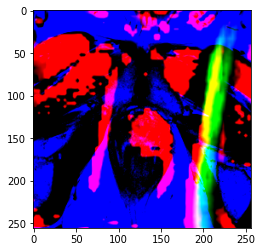

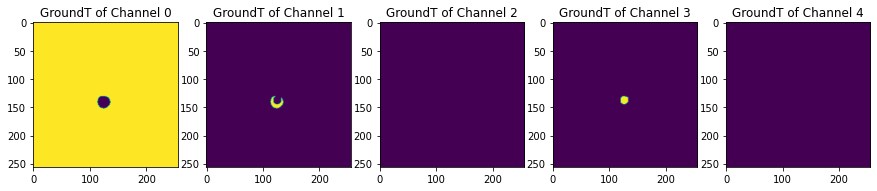

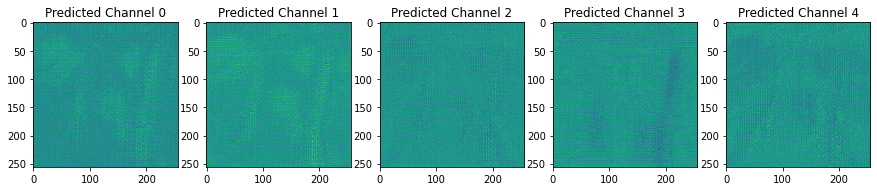

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


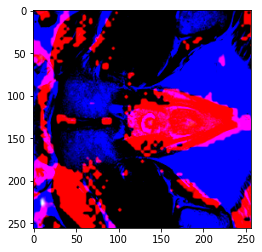

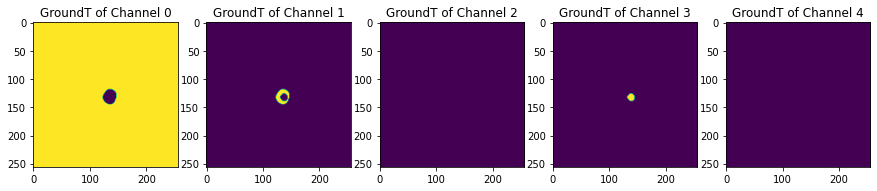

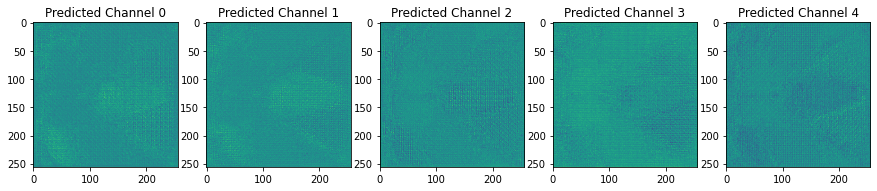

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


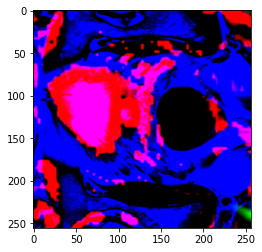

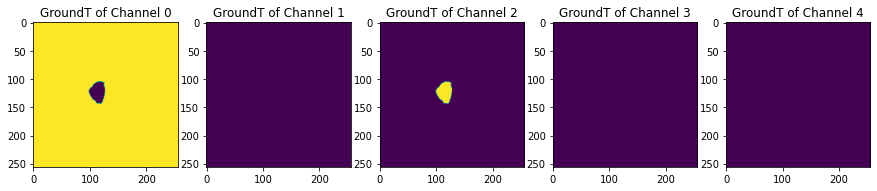

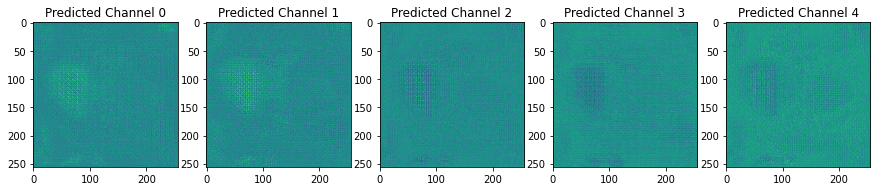

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


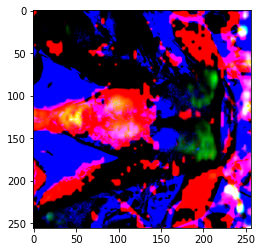

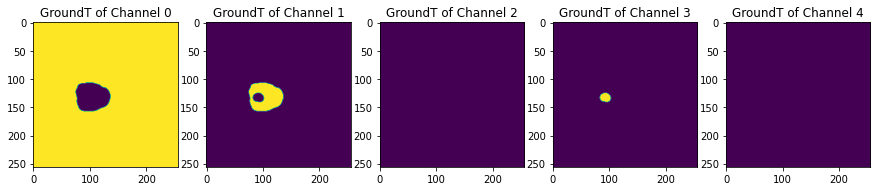

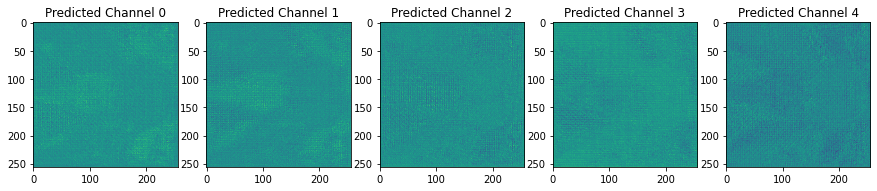

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


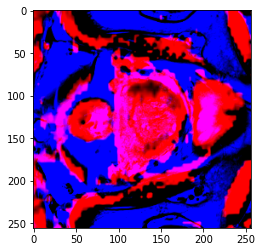

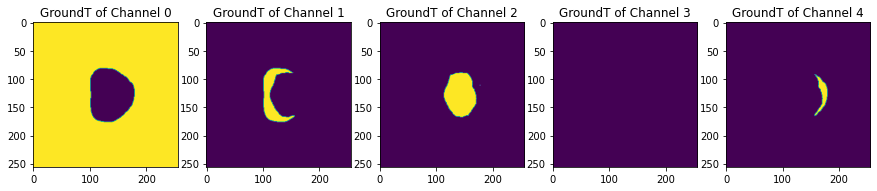

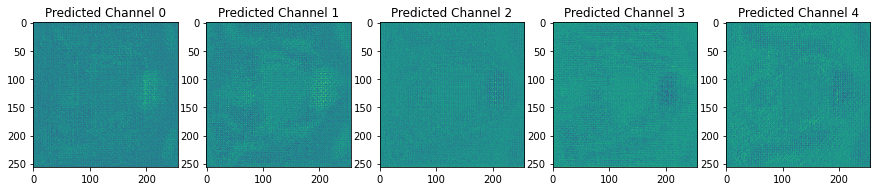

In [25]:
for example_input, example_target in train_dataset.take(5):
    generate_images(generator, example_input, example_target)


## Training

   * For each example input generate an output.
   * The discriminator receives the input_image and the generated image as the first input. The second input is the input_image and the target_image.
   * Next, calculate the generator and the discriminator loss.
   * Then, calculate the gradients of loss with respect to both the generator and the discriminator variables(inputs) and apply those to the optimizer.
   * Then log the losses to TensorBoard.


In [25]:

summary_writer = tf.summary.create_file_writer(
                                                log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
                                               )

In [26]:
@tf.function
def train_step(input_image, target, epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

    with summary_writer.as_default():
        tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=epoch)
        tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=epoch)
        tf.summary.scalar('disc_loss', disc_loss, step=epoch)


## The actual training loop:

   * Iterates over the number of epochs.
   * On each epoch it clears the display, and runs generate_images to show it's progress.
   * On each epoch it iterates over the training dataset, printing a '.' for each example.
   * It saves a checkpoint every 20 epochs.


In [27]:
def fit(train_ds, epochs, test_ds):
    for epoch in range(epochs):
        start = time.time()

        display.clear_output(wait=True)

        for example_input, example_target in test_ds.take(1):
            generate_images(generator, example_input, example_target)
            time.sleep(5)
        print("Epoch: ", epoch)

        # Train
        for n, (input_image, target) in train_ds.enumerate():
            print('.', end='')
            if (n+1) % 100 == 0:
                print()
            train_step(input_image, target, epoch)
        print()

        # saving (checkpoint) the model every 20 epochs
        if (epoch + 1) % 10 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

        print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))
    checkpoint.save(file_prefix=checkpoint_prefix)


In [33]:
!kill 2513575

In [35]:
#ssh -L 16007:127.0.0.1:16007 ziaeea21@dgx1-em1.vda.univie.ac.at
%reload_ext tensorboard
%tensorboard --logdir {log_dir} --port=16007


Reusing TensorBoard on port 16007 (pid 3562666), started 0:00:37 ago. (Use '!kill 3562666' to kill it.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


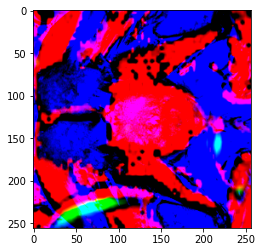

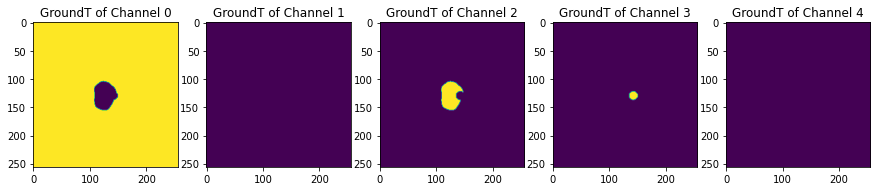

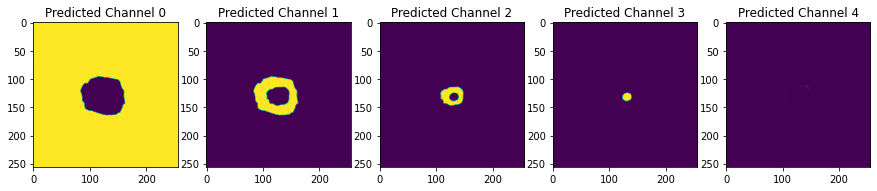


Epoch:  299
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...................
Time taken for epoch 300 is 44.89248085021973 sec



In [31]:
fit(train_dataset, 300, train_dataset)


In [28]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


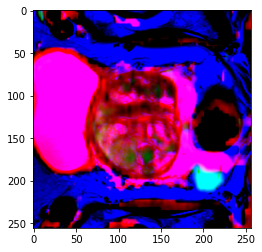

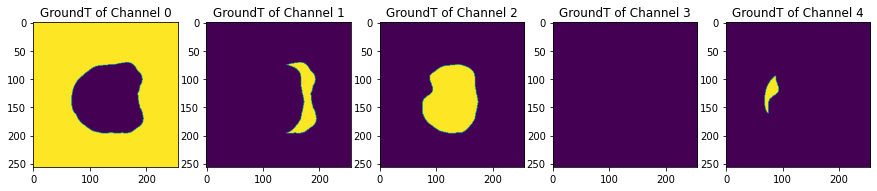

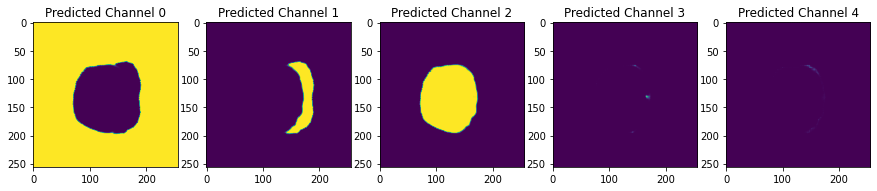

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


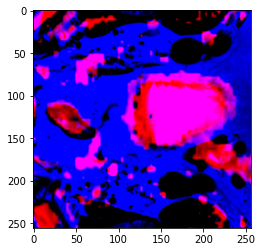

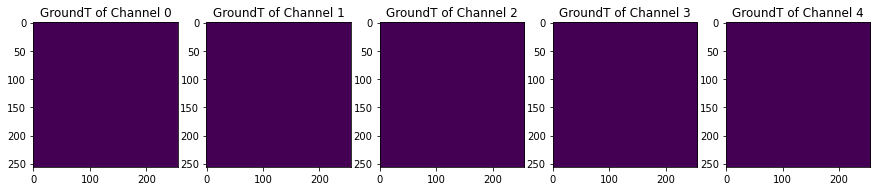

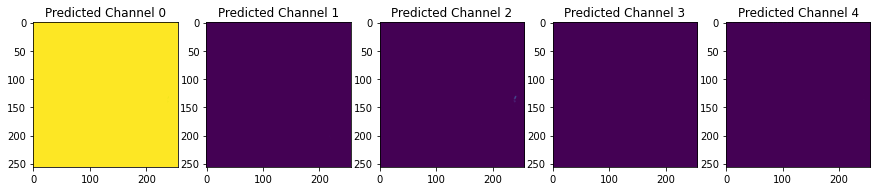

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


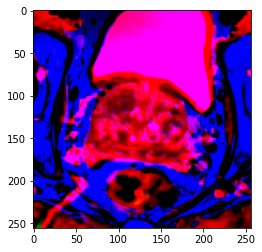

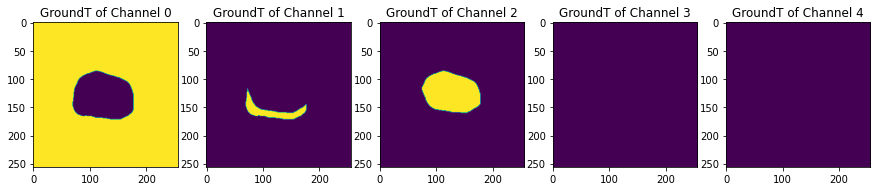

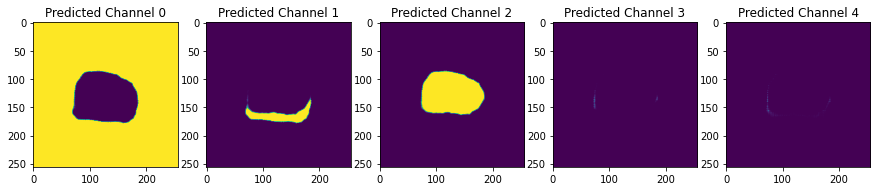

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


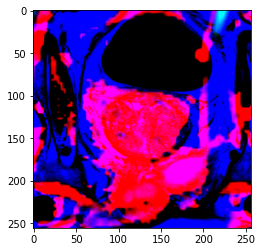

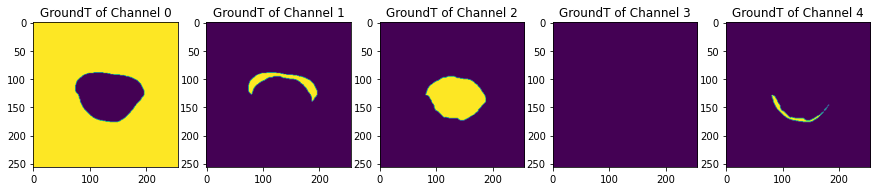

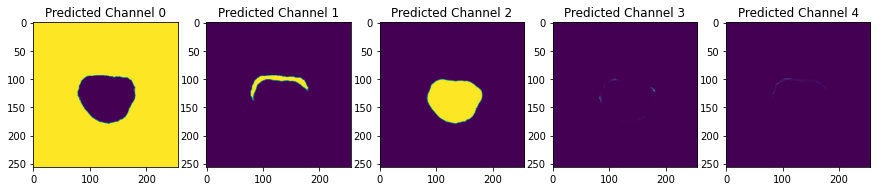

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


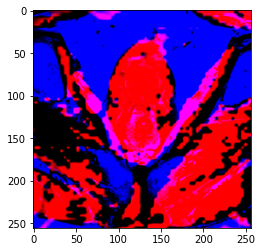

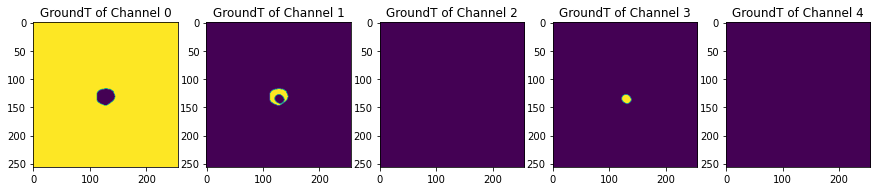

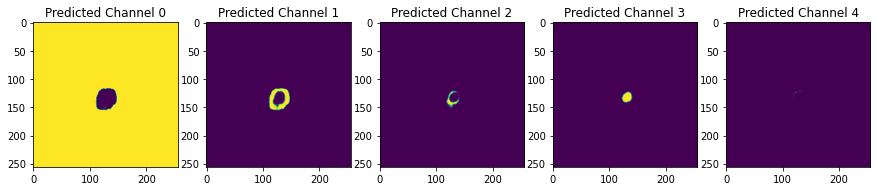

In [30]:
for example_input, example_target in train_dataset.take(5):
    generate_images(generator, example_input, example_target)